In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame,Series
import seaborn as sns 
import matplotlib as plt
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import root_mean_squared_error,mean_squared_error
import pickle
 




# Load the Data

In [2]:
Jan_df=pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2024-01.parquet')
Feb_df=pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2024-02.parquet')

In [30]:
import os 
os.makedirs('data',exist_ok=True)

Jan_df.to_csv('data/train_data.csv',index=False)
Feb_df.to_csv('data/valid_data.csv',index=False)

# Initially Explore Data

In [3]:
Jan_df.head()


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2024-01-01 00:46:55,2024-01-01 00:58:25,N,1.0,236,239,1.0,1.98,12.8,1.0,0.5,3.61,0.0,NaN,1.0,21.66,1.0,1.0,2.75
1,2,2024-01-01 00:31:42,2024-01-01 00:52:34,N,1.0,65,170,5.0,6.54,30.3,1.0,0.5,7.11,0.0,NaN,1.0,42.66,1.0,1.0,2.75
2,2,2024-01-01 00:30:21,2024-01-01 00:49:23,N,1.0,74,262,1.0,3.08,19.8,1.0,0.5,3.00,0.0,NaN,1.0,28.05,1.0,1.0,2.75
3,1,2024-01-01 00:30:20,2024-01-01 00:42:12,N,1.0,74,116,1.0,2.40,14.2,1.0,1.5,0.00,0.0,NaN,1.0,16.70,2.0,1.0,0.00
4,2,2024-01-01 00:32:38,2024-01-01 00:43:37,N,1.0,74,243,1.0,5.14,22.6,1.0,0.5,6.28,0.0,NaN,1.0,31.38,1.0,1.0,0.00


In [4]:
Feb_df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2024-02-01 00:15:53,2024-02-01 00:24:20,N,1.0,75,161,1.0,2.77,13.5,1.0,0.5,3.75,0.0,NaN,1.0,22.50,1.0,1.0,2.75
1,2,2024-01-31 22:59:22,2024-01-31 23:27:14,N,1.0,43,242,1.0,7.76,36.6,1.0,0.5,0.00,0.0,NaN,1.0,39.10,2.0,1.0,0.00
2,2,2024-02-01 00:30:29,2024-02-01 00:35:32,N,1.0,75,238,1.0,1.03,7.9,1.0,0.5,2.60,0.0,NaN,1.0,13.00,1.0,1.0,0.00
3,2,2024-01-31 23:56:42,2024-02-01 00:06:53,N,1.0,80,17,2.0,1.36,11.4,1.0,0.5,4.17,0.0,NaN,1.0,18.07,1.0,1.0,0.00
4,2,2024-02-01 00:31:14,2024-02-01 00:31:16,N,5.0,95,264,1.0,0.00,50.0,0.0,0.0,1.00,0.0,NaN,1.0,52.00,1.0,2.0,0.00


In [5]:
Jan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56551 entries, 0 to 56550
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               56551 non-null  int32         
 1   lpep_pickup_datetime   56551 non-null  datetime64[us]
 2   lpep_dropoff_datetime  56551 non-null  datetime64[us]
 3   store_and_fwd_flag     53136 non-null  object        
 4   RatecodeID             53136 non-null  float64       
 5   PULocationID           56551 non-null  int32         
 6   DOLocationID           56551 non-null  int32         
 7   passenger_count        53136 non-null  float64       
 8   trip_distance          56551 non-null  float64       
 9   fare_amount            56551 non-null  float64       
 10  extra                  56551 non-null  float64       
 11  mta_tax                56551 non-null  float64       
 12  tip_amount             56551 non-null  float64       
 13  t

In [6]:
Jan_df.isnull().sum()

VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag        3415
RatecodeID                3415
PULocationID                 0
DOLocationID                 0
passenger_count           3415
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                56551
improvement_surcharge        0
total_amount                 0
payment_type              3415
trip_type                 3418
congestion_surcharge      3415
dtype: int64

# Feature Engineering

#### we are going to use the tpep_pickup_datetime  and tpep_dropoff_datetime to get the trip duration 


In [7]:
Jan_df['trip_duration_min']=(Jan_df['lpep_dropoff_datetime']-Jan_df['lpep_pickup_datetime']).dt.total_seconds()/60

In [8]:
Jan_df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_duration_min
0,2,2024-01-01 00:46:55,2024-01-01 00:58:25,N,1.0,236,239,1.0,1.98,12.80,...,0.5,3.61,0.0,NaN,1.0,21.66,1.0,1.0,2.75,11.500000
1,2,2024-01-01 00:31:42,2024-01-01 00:52:34,N,1.0,65,170,5.0,6.54,30.30,...,0.5,7.11,0.0,NaN,1.0,42.66,1.0,1.0,2.75,20.866667
2,2,2024-01-01 00:30:21,2024-01-01 00:49:23,N,1.0,74,262,1.0,3.08,19.80,...,0.5,3.00,0.0,NaN,1.0,28.05,1.0,1.0,2.75,19.033333
3,1,2024-01-01 00:30:20,2024-01-01 00:42:12,N,1.0,74,116,1.0,2.40,14.20,...,1.5,0.00,0.0,NaN,1.0,16.70,2.0,1.0,0.00,11.866667
4,2,2024-01-01 00:32:38,2024-01-01 00:43:37,N,1.0,74,243,1.0,5.14,22.60,...,0.5,6.28,0.0,NaN,1.0,31.38,1.0,1.0,0.00,10.983333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56546,2,2024-01-31 20:46:00,2024-01-31 20:55:00,None,NaN,33,25,NaN,0.00,11.58,...,0.0,3.14,0.0,NaN,1.0,15.72,NaN,NaN,NaN,9.000000
56547,2,2024-01-31 21:06:00,2024-01-31 21:11:00,None,NaN,72,72,NaN,0.49,11.58,...,0.0,0.00,0.0,NaN,1.0,12.58,NaN,NaN,NaN,5.000000
56548,2,2024-01-31 21:36:00,2024-01-31 21:40:00,None,NaN,72,72,NaN,0.52,11.58,...,0.0,2.52,0.0,NaN,1.0,15.10,NaN,NaN,NaN,4.000000
56549,2,2024-01-31 22:45:00,2024-01-31 22:51:00,None,NaN,41,42,NaN,1.17,14.22,...,0.0,0.00,0.0,NaN,1.0,15.22,NaN,NaN,NaN,6.000000


<Axes: xlabel='trip_duration_min', ylabel='Count'>

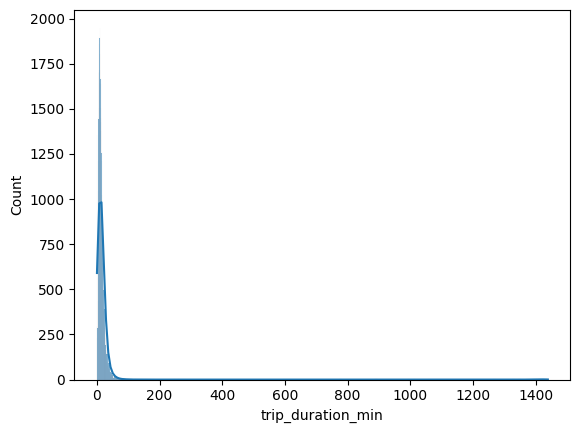

In [9]:
sns.histplot(Jan_df['trip_duration_min'], kde=True)

In [10]:
Jan_df['trip_duration_min'].describe(percentiles=[0.95,0.98,0.99])

count    56551.000000
mean        18.171379
std         75.464751
min          0.000000
50%         11.400000
95%         33.683333
98%         46.816667
99%         59.825000
max       1438.983333
Name: trip_duration_min, dtype: float64

In [11]:
Jan_df_2=Jan_df[(Jan_df['trip_duration_min'] >=1)&(Jan_df['trip_duration_min'] <=60)]

In [12]:
Jan_df_2.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_duration_min
0,2,2024-01-01 00:46:55,2024-01-01 00:58:25,N,1.0,236,239,1.0,1.98,12.8,...,0.5,3.61,0.0,NaN,1.0,21.66,1.0,1.0,2.75,11.500000
1,2,2024-01-01 00:31:42,2024-01-01 00:52:34,N,1.0,65,170,5.0,6.54,30.3,...,0.5,7.11,0.0,NaN,1.0,42.66,1.0,1.0,2.75,20.866667
2,2,2024-01-01 00:30:21,2024-01-01 00:49:23,N,1.0,74,262,1.0,3.08,19.8,...,0.5,3.00,0.0,NaN,1.0,28.05,1.0,1.0,2.75,19.033333
3,1,2024-01-01 00:30:20,2024-01-01 00:42:12,N,1.0,74,116,1.0,2.40,14.2,...,1.5,0.00,0.0,NaN,1.0,16.70,2.0,1.0,0.00,11.866667
4,2,2024-01-01 00:32:38,2024-01-01 00:43:37,N,1.0,74,243,1.0,5.14,22.6,...,0.5,6.28,0.0,NaN,1.0,31.38,1.0,1.0,0.00,10.983333


In [13]:
categorical=['PULocationID','DOLocationID']
numerical=['trip_distance']

Jan_df_2[categorical]=Jan_df_2[categorical].astype('category')

/tmp/ipykernel_8223/2021245415.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Jan_df_2[categorical]=Jan_df_2[categorical].astype('category')


In [14]:
Jan_df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54373 entries, 0 to 56550
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               54373 non-null  int32         
 1   lpep_pickup_datetime   54373 non-null  datetime64[us]
 2   lpep_dropoff_datetime  54373 non-null  datetime64[us]
 3   store_and_fwd_flag     51062 non-null  object        
 4   RatecodeID             51062 non-null  float64       
 5   PULocationID           54373 non-null  category      
 6   DOLocationID           54373 non-null  category      
 7   passenger_count        51062 non-null  float64       
 8   trip_distance          54373 non-null  float64       
 9   fare_amount            54373 non-null  float64       
 10  extra                  54373 non-null  float64       
 11  mta_tax                54373 non-null  float64       
 12  tip_amount             54373 non-null  float64       
 13  tolls_

In [15]:
train_dic=Jan_df_2[numerical+categorical].to_dict(orient='records')


In [16]:
dv=DictVectorizer()
X_train=dv.fit_transform(train_dic)

In [17]:
X_train

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 163119 stored elements and shape (54373, 3)>

In [18]:
target='trip_duration_min'
y_train=Jan_df_2[target].values

# Train model

In [19]:
Lr= LinearRegression()
Lr.fit(X_train,y_train)


LinearRegression()

##### predicting on the train is not ideal as it exposes the model
##### but for learnnig purpose lets use it 

In [20]:
y_pred=Lr.predict(X_train)

mse=mean_squared_error(y_train,y_pred)
rmse=np.sqrt(mse)

rmse

np.float64(8.944081902346614)

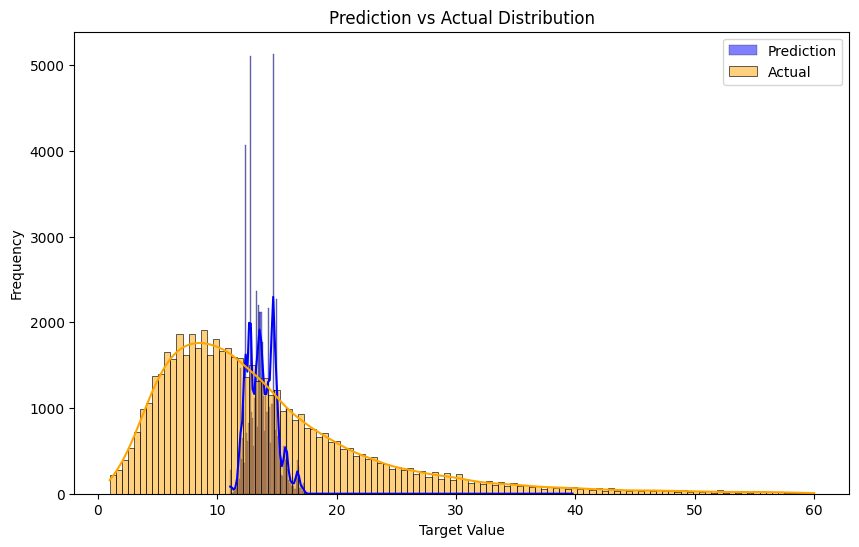

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))  # Set figure size

sns.histplot(y_pred, label='Prediction', kde=True, color='blue')
sns.histplot(y_train, label='Actual', kde=True, color='orange')

plt.legend()
plt.title('Prediction vs Actual Distribution')
plt.xlabel('Target Value')
plt.ylabel('Frequency')
plt.show()

# Let's put the preprocessing in a function

In [22]:
def read_and_preprocess(filename):
    df=pd.read_parquet(filename)
    df['trip_duration_min']=(df['lpep_dropoff_datetime']-df['lpep_pickup_datetime']).dt.total_seconds()/60
    df=df[(df['trip_duration_min'] >=1)&(df['trip_duration_min'] <=60)]

    categorical=['PULocationID','DOLocationID']
    #numerical=['trip_distance']

    df[categorical]=df[categorical].astype('category')
    return df



In [23]:
df_train=read_and_preprocess('https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2024-01.parquet')
df_valid=read_and_preprocess('https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2024-02.parquet')

In [24]:
categorical=['PULocationID','DOLocationID']
numerical=['trip_distance']


dv=DictVectorizer()
train_dic=df_train[numerical+categorical].to_dict(orient='records')
X_train=dv.fit_transform(train_dic)

val_dic=df_valid[numerical+categorical].to_dict(orient='records')
X_val=dv.transform(val_dic)




In [25]:
target='trip_duration_min'
y_train=df_train[target].values

y_valid=df_valid[target].values

In [26]:
Lr= LinearRegression()
Lr.fit(X_train,y_train)

y_pred=Lr.predict(X_val)

mse=mean_squared_error(y_valid,y_pred)
rmse=np.sqrt(mse)

rmse

np.float64(9.02359102460649)

In [32]:

params={'alpha':0.01}
Ls= Lasso(**params)

Ls.fit(X_train,y_train)

y_pred=Ls.predict(X_val)

mse=mean_squared_error(y_valid,y_pred)
rmse=np.sqrt(mse)

rmse

np.float64(9.023594007015081)

In [28]:
import os

os.makedirs('models', exist_ok=True)  # Create folder if it doesn't exist

with open('models/lin_reg.bin', 'wb') as f_out:
    pickle.dump((dv, Lr), f_out)

In [31]:
import mlflow

mlflow.set_tracking_uri('http://127.0.0.1:5000')
mlflow.set_experiment('nyc-taxi-experiment')


2025/05/12 03:46:25 INFO mlflow.tracking.fluent: Experiment with name 'nyc-taxi-experiment' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/596310372276179798', creation_time=1747021585742, experiment_id='596310372276179798', last_update_time=1747021585742, lifecycle_stage='active', name='nyc-taxi-experiment', tags={}>

In [33]:
with mlflow.start_run():
    
    mlflow.log_params(params)
    mlflow.log_param("train-data-path","./data/train_data.csv")
    mlflow.log_param("valid-data-path","data/valid_data.csv")
    mlflow.log_metric("root_mean_square_error",rmse)
    mlflow.set_tag("baseline_model","Nii Sowah")



🏃 View run unleashed-asp-105 at: http://127.0.0.1:5000/#/experiments/596310372276179798/runs/c310f8fdfa6f4c0cacd5cb6ed92fa497
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/596310372276179798
